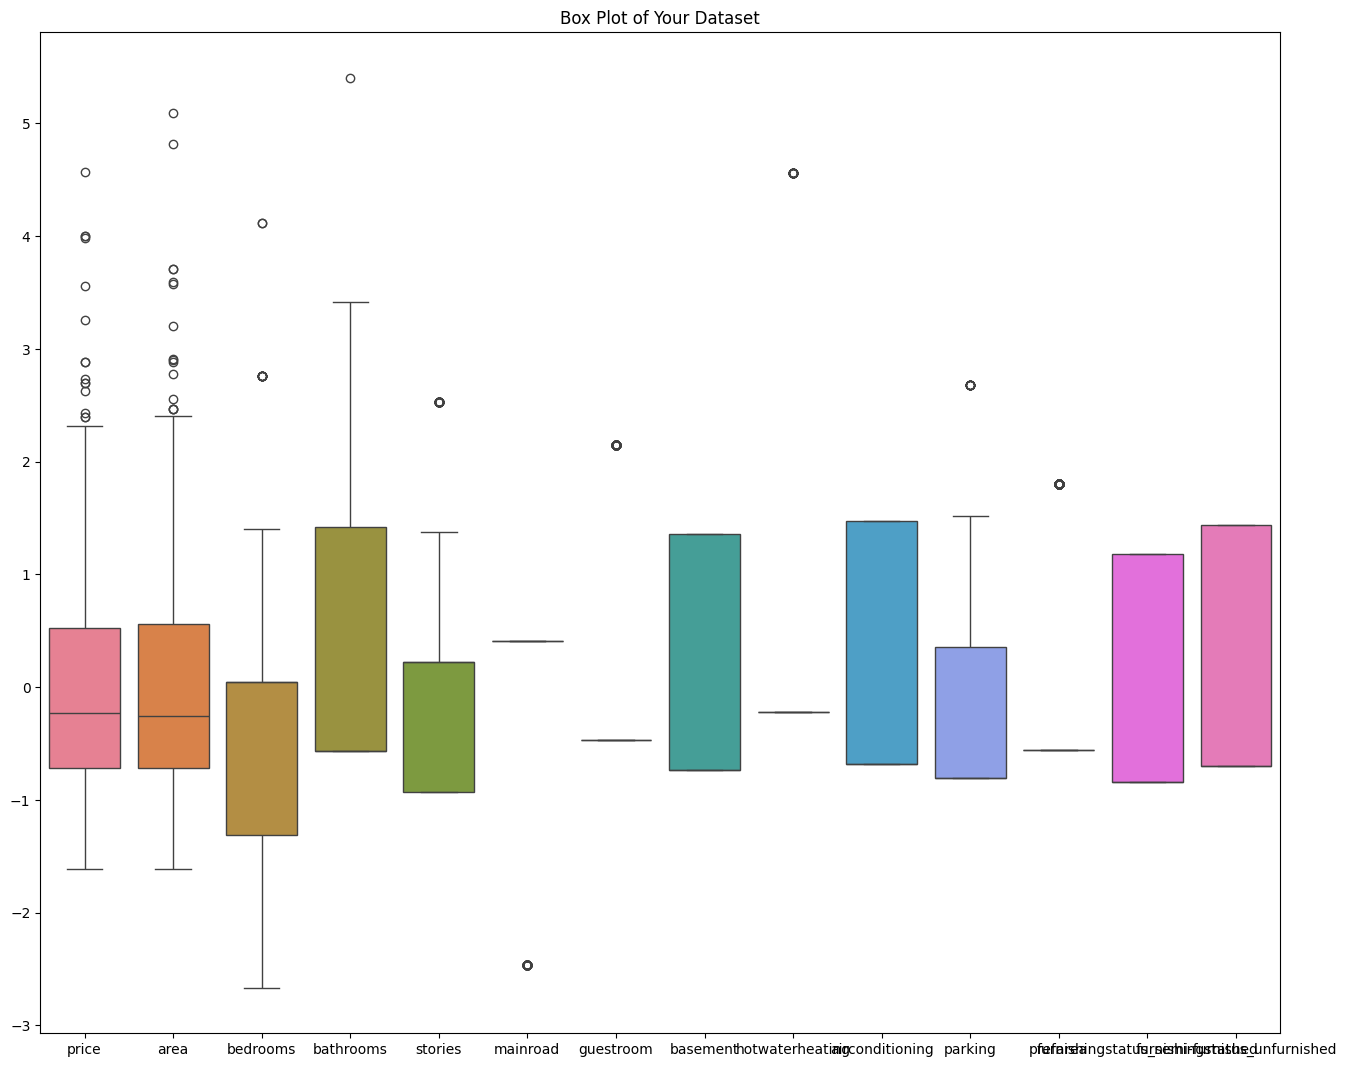

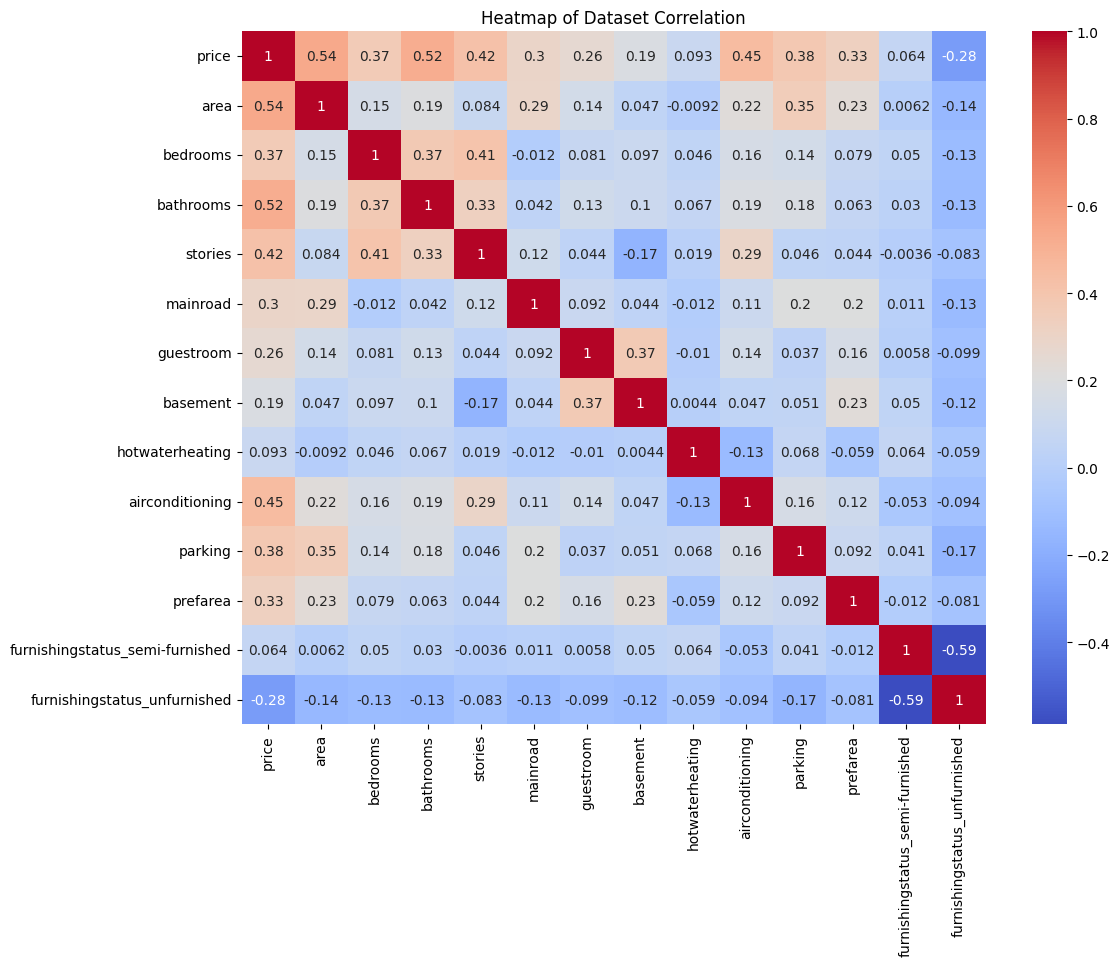

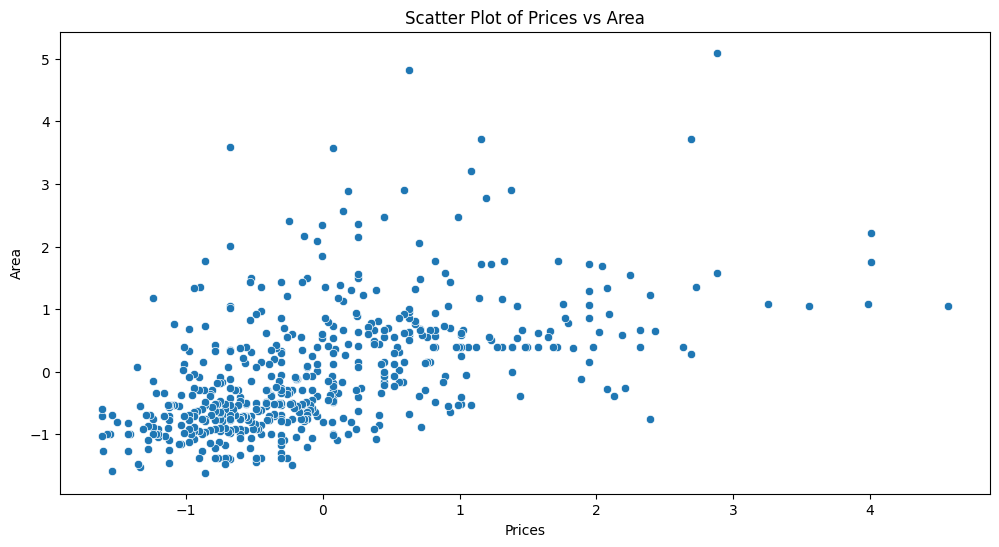

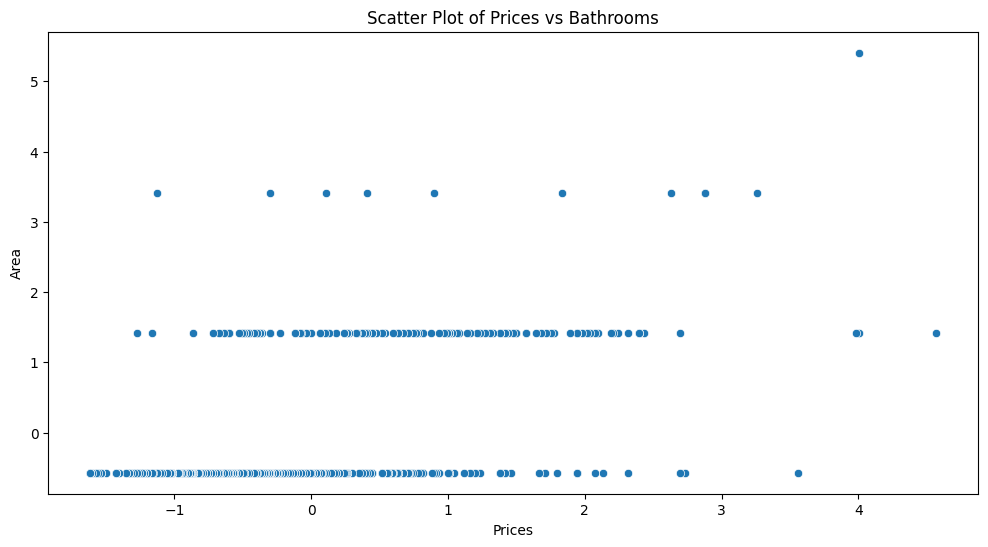

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_df = pd.read_csv('cleaned_house.csv')

house_df = house_df.drop(columns = 'Unnamed: 0')

plt.figure(figsize=(16, 13))
sns.boxplot(data=house_df)
plt.title('Box Plot of Your Dataset')
plt.show()

# Example 2: Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Dataset Correlation')
plt.show()

# Example 3: Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='area', data=house_df)
plt.title('Scatter Plot of Prices vs Area')
plt.xlabel('Prices')
plt.ylabel('Area')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='bathrooms', data=house_df)
plt.title('Scatter Plot of Prices vs Bathrooms')
plt.xlabel('Prices')
plt.ylabel('Area')
plt.show()

In [1]:
# multiple linear regression 
# set boundaries for house prices, clustering algorithim 
# when we do that especially w clustering then we have way more options that we can use the data 